In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.api import qqplot
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [2]:
print("pandas version " + pd.__version__)
print("numpy version " + np.__version__)
print("scipy version " + scipy.__version__)
print("matplotlib version " + matplotlib.__version__)
print("seaborn version " + sns.__version__)
print("statsmodels version " + sm.__version__)

pandas version 1.0.5
numpy version 1.18.5
scipy version 1.5.0
matplotlib version 3.2.2
seaborn version 0.10.1
statsmodels version 0.11.1


In [3]:
df = pd.read_csv(r"medical_clean.csv")

In [4]:
#pd.options.display.float_format = '{:,.6f}'.format
pd.set_option('display.max_columns', None) #show all columns

In [5]:
#df.describe()

In [6]:
df.rename(columns={df.columns[0]: "Original_order"}, inplace=True)

In [7]:
df.columns

Index(['Original_order', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [8]:
df['ReAdmis'].value_counts()

No     6331
Yes    3669
Name: ReAdmis, dtype: int64

In [9]:
cleanup_ed = {'No Schooling Completed': 0,
             'Nursery School to 8th Grade': 1,
              '9th Grade to 12th Grade, No Diploma': 9,
              'Some College, Less than 1 Year': 12,
              'GED or Alternative Credential': 12,
              'Regular High School Diploma': 12,
              'Professional School Degree': 12,
              'Some College, 1 or More Years, No Degree':13,
              'Associate\'s Degree': 14,
              'Bachelor\'s Degree': 16,
              'Master\'s Degree': 18,            
              'Doctorate Degree': 20
             }

In [10]:
df.replace(cleanup_ed, inplace=True)

In [11]:
df.shape

(10000, 50)

In [12]:
df.isna().any()

Original_order        False
Customer_id           False
Interaction           False
UID                   False
City                  False
State                 False
County                False
Zip                   False
Lat                   False
Lng                   False
Population            False
Area                  False
TimeZone              False
Job                   False
Children              False
Age                   False
Income                False
Marital               False
Gender                False
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
vitD_supp             False
Soft_drink            False
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain              False
Anxiety               False
Allergic_rhinitis   

In [13]:
print(df.Population.max())

122814


In [14]:
#pop = pd.qcut(df['Population'], q=4)
#print(type(pop))
#print(len(pop))

In [15]:
#df.drop(labels='Population', axis="columns", inplace=True)
#df = df.assign(Population = pop.values)

In [16]:
#pd.unique(df.Population)

In [17]:
# numeric_data = df.select_dtypes(include=np.number)
# numeric_data = numeric_data.drop(['Original_order','Zip','Lat','Lng',vitD_supp'], axis=1)

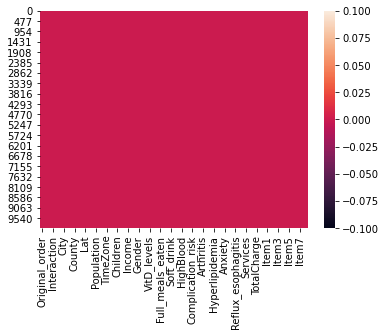

In [18]:
sns.heatmap(df.isnull())

In [19]:
df['Children'].isnull().value_counts()

False    10000
Name: Children, dtype: int64

In [20]:
df['Age'].isnull().value_counts()

False    10000
Name: Age, dtype: int64

In [21]:
df['Income'].isnull().value_counts()

False    10000
Name: Income, dtype: int64

In [22]:
df['Soft_drink'].isnull().value_counts()

False    10000
Name: Soft_drink, dtype: int64

In [23]:
df['Overweight'].isnull().value_counts()

False    10000
Name: Overweight, dtype: int64

In [24]:
df['Anxiety'].isnull().value_counts()

False    10000
Name: Anxiety, dtype: int64

In [25]:
df['ReAdmis'].isnull().value_counts()

False    10000
Name: ReAdmis, dtype: int64

In [26]:
df['Gender'].value_counts()

Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

In [27]:
pd.unique(df['County'].value_counts())

array([118, 100,  93,  88,  80,  78,  69,  62,  60,  59,  58,  57,  55,
        54,  48,  46,  44,  43,  42,  41,  39,  38,  37,  36,  34,  33,
        32,  31,  30,  29,  27,  26,  25,  24,  23,  22,  21,  20,  19,
        18,  17,  16,  15,  14,  13,  12,  11,  10,   9,   8,   7,   6,
         5,   4,   3,   2,   1], dtype=int64)

In [28]:
pd.unique(df['Job'].value_counts())

array([29, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12,
       11, 10,  9,  8,  7,  6], dtype=int64)

In [29]:
#df['readmission'] = pd.Series(np.where(df.ReAdmis.values == 'Yes', 1, 0),
#          df.index)

In [30]:
n = len(pd.unique(df['Zip'])) 
print(n)

8612


In [31]:
n = len(pd.unique(df['City'])) 
print(n)

6072


In [32]:
categorical_data = df.select_dtypes(exclude=np.number)

In [33]:
categorical_data.shape

(10000, 27)

In [34]:
numerical_data = df.select_dtypes(include=np.number)

In [35]:
categorical_data.columns

Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Area',
       'TimeZone', 'Job', 'Marital', 'Gender', 'ReAdmis', 'Soft_drink',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services'],
      dtype='object')

In [36]:
numerical_data.columns

Index(['Original_order', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age',
       'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [37]:
#categorical_data.head(5)

In [38]:
numerical_data.head(5)

,Original_order,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,35621,34.34960,-86.72508,2951,1,53,86575.93,19.141466,6,0,0,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,32446,30.84513,-85.22907,11303,3,51,46805.99,18.940352,4,2,1,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,57110,43.54321,-96.63772,17125,3,53,14370.14,18.057507,4,1,0,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,56072,43.89744,-93.51479,2162,0,78,39741.49,16.576858,4,1,0,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,23181,37.59894,-76.88958,5287,1,22,1209.56,17.439069,5,0,2,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7C899A3D0>,
      dtype=object)

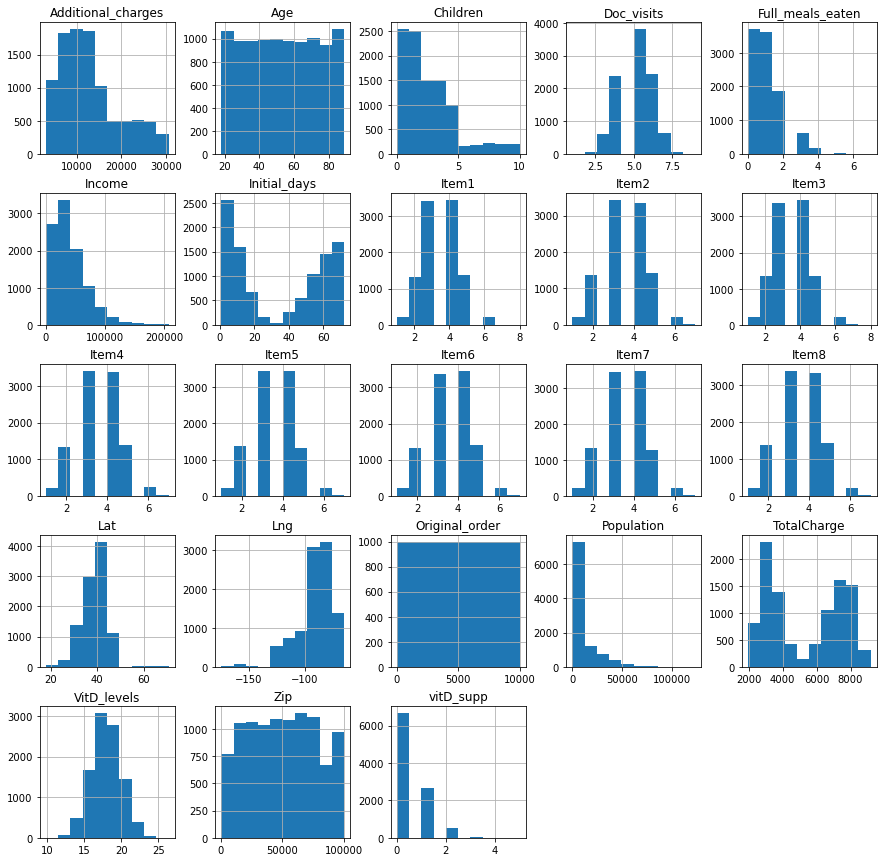

In [39]:
df.hist(figsize = (15,15))

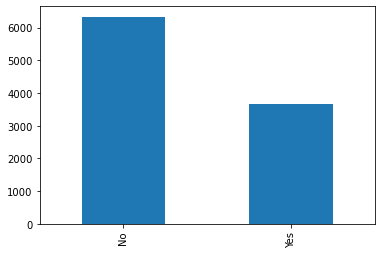

In [40]:
df['ReAdmis'].value_counts().plot.bar()

In [41]:
#readmission = df['readmission']

In [42]:
df['ReAdmis'].value_counts()

No     6331
Yes    3669
Name: ReAdmis, dtype: int64

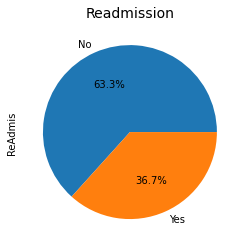

In [43]:
df['ReAdmis'].value_counts().plot.pie(autopct="%.1f%%");
plt.title("Readmission", fontsize=14);

In [44]:
df.groupby('ReAdmis').mean()

,Original_order,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
ReAdmis,,,,,,,,,,,,,,,,,,,,,,,
No,3550.541779,49987.470700,38.810183,-91.228998,9739.104249,2.058443,53.263308,40740.257109,17.957993,5.012004,1.010741,0.393619,17.414699,3911.772150,12866.696031,3.531985,3.508608,3.520297,3.516664,3.492497,3.535776,3.497868,3.522982
Yes,7502.458436,50455.863178,38.649146,-91.267379,10355.483510,2.164077,53.940311,40059.521352,17.975079,5.012537,0.985282,0.408013,63.859507,7728.617663,13051.576261,3.496048,3.503407,3.495230,3.512401,3.504497,3.499591,3.487326,3.486781


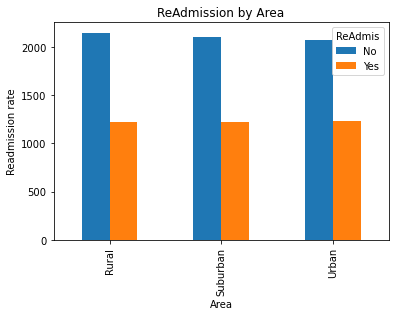

In [45]:
#%matplotlib inline
pd.crosstab(df.Area,df.ReAdmis).plot(kind='bar')
plt.title('ReAdmission by Area')
plt.xlabel('Area')
plt.ylabel('Readmission rate')
plt.savefig('Area and readmission')

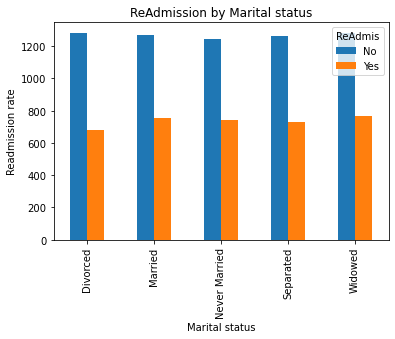

In [46]:
#%matplotlib inline
pd.crosstab(df.Marital,df.ReAdmis).plot(kind='bar')
plt.title('ReAdmission by Marital status')
plt.xlabel('Marital status')
plt.ylabel('Readmission rate')
plt.savefig('Marital status and readmission')

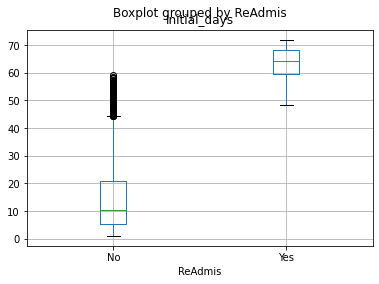

In [47]:
df.boxplot(column='Initial_days', by='ReAdmis')

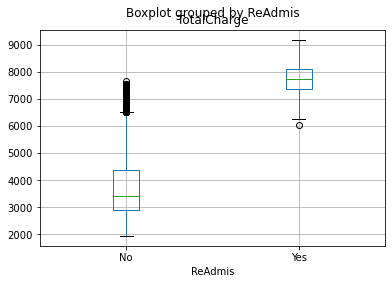

In [48]:
df.boxplot(column='TotalCharge', by='ReAdmis')

Deleting variables

excessive nulls

high number of unique observations(zip)



In [49]:
df.columns

Index(['Original_order', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [50]:
df = df.drop(['Customer_id', 'Interaction', 'UID', 'Zip',
       'Lat', 'Lng', 'City', 'State','County','Job','Soft_drink'], axis = 1) 


In [51]:
#df = df.dropna(subset=['Anxiety'])

In [52]:
df = df.dropna(subset=['TimeZone'])

In [53]:
df.shape

(10000, 39)

In [54]:
correl  = df.corr()

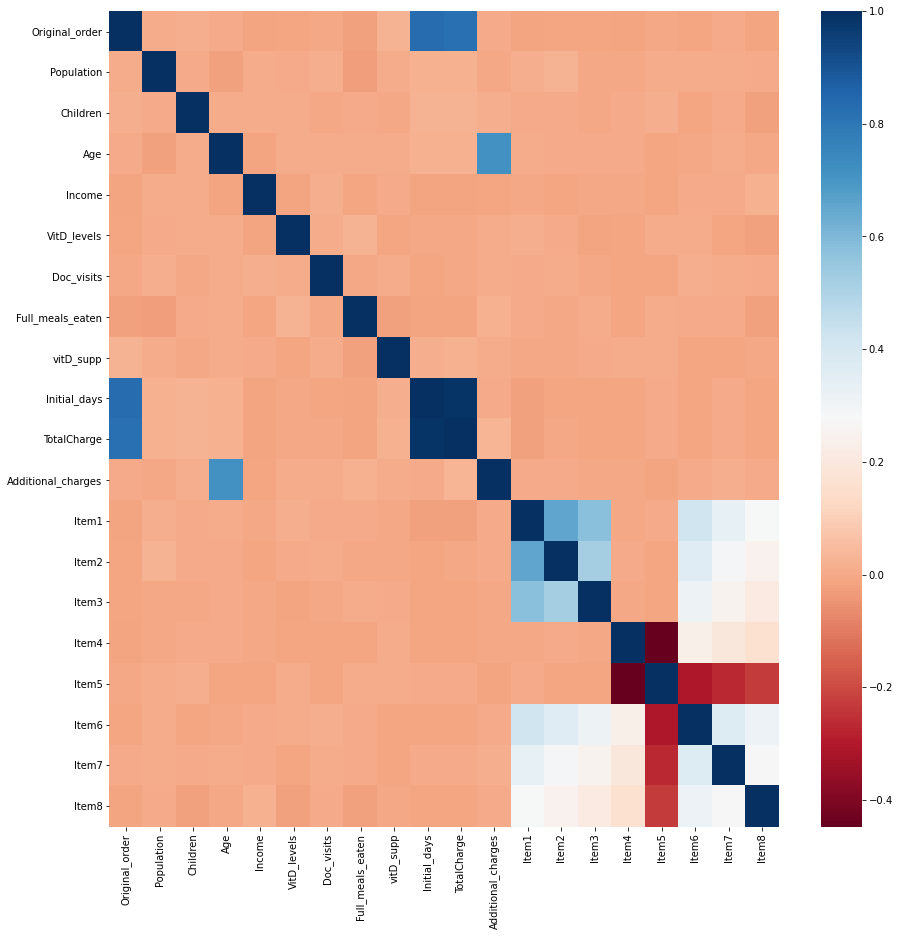

In [55]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correl, xticklabels = correl.columns, yticklabels = correl.columns, cmap='RdBu') 

In [56]:
list(df.columns)

['Original_order',
 'Population',
 'Area',
 'TimeZone',
 'Children',
 'Age',
 'Income',
 'Marital',
 'Gender',
 'ReAdmis',
 'VitD_levels',
 'Doc_visits',
 'Full_meals_eaten',
 'vitD_supp',
 'Initial_admin',
 'HighBlood',
 'Stroke',
 'Complication_risk',
 'Overweight',
 'Arthritis',
 'Diabetes',
 'Hyperlipidemia',
 'BackPain',
 'Anxiety',
 'Allergic_rhinitis',
 'Reflux_esophagitis',
 'Asthma',
 'Services',
 'Initial_days',
 'TotalCharge',
 'Additional_charges',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8']

coding yes/ no columns to 1 or 0

columns:

ReAdmis
Soft_drink
HighBlood
Stroke
Overweight
Arthitis
Diabetes
Hyperlipidemia
BackPain
Anxiety
Allergic_rhinitis
Reflux_esophagitis
Asthma


In [57]:
#df['ReAdmis']=df.ReAdmis.map(dict(Yes=1, No=0))
df['HighBlood']=df.HighBlood.map(dict(Yes=1, No=0))
df['Stroke']=df.Stroke.map(dict(Yes=1, No=0))
df['Overweight']=df.Overweight.map(dict(Yes=1, No=0))
df['Arthritis']=df.Arthritis.map(dict(Yes=1, No=0))
df['Diabetes']=df.Diabetes.map(dict(Yes=1, No=0))
df['Hyperlipidemia']=df.Hyperlipidemia.map(dict(Yes=1, No=0))
df['BackPain']=df.BackPain.map(dict(Yes=1, No=0))
df['Anxiety']=df.Anxiety.map(dict(Yes=1, No=0))
df['Allergic_rhinitis']=df.Allergic_rhinitis.map(dict(Yes=1, No=0))
df['Reflux_esophagitis']=df.Reflux_esophagitis.map(dict(Yes=1, No=0))
df['Asthma']=df.Asthma.map(dict(Yes=1, No=0))

# df = df.HighBlood.replace(to_replace=['No', 'Yes'], value=[0, 1])
# df = df.Stroke.replace(to_replace=['No', 'Yes'], value=[0, 1])
# df = df.Overweight.replace(to_replace=['No', 'Yes'], value=[0, 1])
# df = df.Arthritis.replace(to_replace=['No', 'Yes'], value=[0, 1])
# df = df.Diabetes.replace(to_replace=['No', 'Yes'], value=[0, 1])
# df = df.Hyperlipidemia.replace(to_replace=['No', 'Yes'], value=[0, 1])
# df = df.BackPain.replace(to_replace=['No', 'Yes'], value=[0, 1])
# df = df.Anxiety.replace(to_replace=['No', 'Yes'], value=[0, 1])
# df = df.Allergic_rhinitis.replace(to_replace=['No', 'Yes'], value=[0, 1])
# df = df.Reflux_esophagitis.replace(to_replace=['No', 'Yes'], value=[0, 1])
# df = df.Asthma.replace(to_replace=['No', 'Yes'], value=[0, 1])

In [58]:
df.head(5)

,Original_order,Population,Area,TimeZone,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,2951,Suburban,America/Chicago,1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,Emergency Admission,1,0,Medium,0,1,1,0,1,1,1,0,1,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,11303,Urban,America/Chicago,3,51,46805.99,Married,Female,No,18.940352,4,2,1,Emergency Admission,1,0,High,1,0,0,0,0,0,0,1,0,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,17125,Suburban,America/Chicago,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,Elective Admission,1,0,Medium,1,0,1,0,0,0,0,0,0,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,2162,Suburban,America/Chicago,0,78,39741.49,Married,Male,No,16.576858,4,1,0,Elective Admission,0,1,Medium,0,1,0,0,0,0,0,1,1,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,5287,Rural,America/New_York,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Elective Admission,0,0,Low,0,0,0,1,0,0,1,0,0,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [59]:
df['ReAdmis'].value_counts()

No     6331
Yes    3669
Name: ReAdmis, dtype: int64

In [60]:
df['ReAdmis'].isnull().value_counts()

False    10000
Name: ReAdmis, dtype: int64

Variables for one hot encoding

Area
TimeZone
Marital
Gender
Initial_admin
Complication_risk
Services

In [61]:
df['Initial_admin'] = df['Initial_admin'].str.replace(' Admission', '')

In [62]:
df['Services'] = df['Services'].str.replace(' ', '_')

In [63]:
df['Marital'] = df['Marital'].str.replace(' ','_')

In [64]:
df = pd.concat([df, pd.get_dummies(df['Area'], prefix='Area' , drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['Marital'], prefix='Marital', drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['Gender'], prefix='Gender', drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['Initial_admin'], prefix='Initial_admin', drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['Complication_risk'], prefix='Complication_risk', drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['Services'], prefix='Services', drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['ReAdmis'], prefix='ReAdmis', drop_first=True)], axis=1)
#, drop_first=True

In [65]:
df.drop(['Area'],axis=1, inplace=True)
df.drop(['Marital'],axis=1, inplace=True)
df.drop(['Gender'],axis=1, inplace=True)
df.drop(['Initial_admin'],axis=1, inplace=True)
df.drop(['Complication_risk'],axis=1, inplace=True)
df.drop(['Services'],axis=1, inplace=True)
df.drop(['TimeZone'], axis=1, inplace=True)
df.drop(['ReAdmis'], axis=1, inplace=True)

#dropping "items"
df.drop(['Item1'], axis=1, inplace=True)
df.drop(['Item2'], axis=1, inplace=True)
df.drop(['Item3'], axis=1, inplace=True)
df.drop(['Item4'], axis=1, inplace=True)
df.drop(['Item5'], axis=1, inplace=True)
df.drop(['Item6'], axis=1, inplace=True)
df.drop(['Item7'], axis=1, inplace=True)
df.drop(['Item8'], axis=1, inplace=True)

In [66]:
df.head()

,Original_order,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,TotalCharge,Additional_charges,Area_Suburban,Area_Urban,Marital_Married,Marital_Never_Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency,Initial_admin_Observation,Complication_risk_Low,Complication_risk_Medium,Services_CT_Scan,Services_Intravenous,Services_MRI,ReAdmis_Yes
0,1,2951,1,53,86575.93,19.141466,6,0,0,1,0,0,1,1,0,1,1,1,0,1,10.585770,3726.702860,17939.403420,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
1,2,11303,3,51,46805.99,18.940352,4,2,1,1,0,1,0,0,0,0,0,0,1,0,15.129562,4193.190458,17612.998120,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0
2,3,17125,3,53,14370.14,18.057507,4,1,0,1,0,1,0,1,0,0,0,0,0,0,4.772177,2434.234222,17505.192460,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,4,2162,0,78,39741.49,16.576858,4,1,0,0,1,0,1,0,0,0,0,0,1,1,1.714879,2127.830423,12993.437350,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,5,5287,1,22,1209.56,17.439069,5,0,2,0,0,0,0,0,1,0,0,1,0,0,1.254807,2113.073274,3716.525786,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0


exporting to csv

In [67]:
df.to_csv('prepared_med_data.csv')

Scale data

In [68]:
# from sklearn.preprocessing import StandardScaler
# from sklearn import preprocessing


# # Create the Scaler object
# reA = pd.Series(df['ReAdmis']
# s_df = df.drop("ReAdmis",axis=1)
# scaler = StandardScaler()
# scaled_df = scaler.fit_transform(s_df)

In [69]:
df.shape

(10000, 39)

In [70]:
#titles = s_df.columns

In [71]:
# df = pd.DataFrame(scaled_df, columns = titles)
# df['ReAdmis'] = reA

In [72]:
bb

NameError: name 'bb' is not defined

In [ ]:
df.head(5)

Model

In [ ]:
list(df.columns)

Selecting features

In [ ]:
feature_columns = ['Population',
 'Children',
 'Age',
 'Income',
 'VitD_levels',
 'Doc_visits',
 'Full_meals_eaten',
 'vitD_supp',
 'HighBlood',
 'Stroke',
 'Overweight',
 'Arthritis',
 'Diabetes',
 'Hyperlipidemia',
 'BackPain',
 'Anxiety',
 'Allergic_rhinitis',
 'Reflux_esophagitis',
 'Asthma',
 'Initial_days',
 'TotalCharge',
 'Additional_charges',

 'Area_Suburban',
 'Area_Urban',

 'Marital_Married',
 'Marital_Never_Married',
 'Marital_Separated',
 'Marital_Widowed',
 
 'Gender_Male',
 'Gender_Nonbinary',
 'Initial_admin_Emergency',
 'Initial_admin_Observation',
 
 'Complication_risk_Low',
 'Complication_risk_Medium',

 'Services_CT_Scan',
 'Services_Intravenous',
 'Services_MRI']


#'Gender_Female',
#'Complication_risk_High',
# 'Area_Rural',
# 'Marital_Divorced',
# 'Services_Blood_Work',
#
#


X = df[feature_columns]
y = df.ReAdmis_Yes




#  'Item1',
#  'Item2',
#  'Item3',
#  'Item4',
#  'Item5',
#  'Item6',
#  'Item7',
#  'Item8',

In [ ]:
X.shape

In [ ]:
df['ReAdmis_Yes'].isnull().value_counts()

Splitting Data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
#instantiate model
log_regression = LogisticRegression(solver='liblinear', random_state=0, max_iter=10000)

#fitting model
log_regression.fit(X_train,y_train)

#
y_pred = log_regression.predict(X_test)

In [ ]:
log_regression.score(X_train, y_train)

In [ ]:
#log_regression.coef_[0]
log_regression.coef_

In [ ]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(log_regression.coef_))], axis = 1)
coefficients.columns = ['features','coef']
coefficients.sort_values(by=['coef'], ascending=False)
print(coefficients.sort_values(by=['coef'], ascending=False))

Confusion Matrix using HeatMap

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

In [ ]:
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Confusion matrix evaluation metrics

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))

Statsmodel

 logistic regression in sklearn applies regularization by default whereas statsmodels does not. The models you’re comparing may not be identical.

In [ ]:
#df['ReAdmis']=df.ReAdmis.map(dict(Yes=1, No=0))
log_stats = sm.Logit(y_train, X_train).fit(maxiter=100000)

In [ ]:
log_stats.summary()

In [ ]:
print(log_stats.summary())

REDUCING MODEL

Selecting features based on the P-values that are less than .05

RFE feature selection
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [ ]:
 from sklearn.feature_selection import RFE
 predictors = X_train
 selector = RFE(log_regression, n_features_to_select= 1)
 selector = selector.fit(predictors, y_train);

In [ ]:
X.shape

In [ ]:
 order = selector.ranking_
 order

In [ ]:
 feature_ranks = []
 for i in order:
     feature_ranks.append(f"{i}. {X_train.columns[i-1]}")
 feature_ranks

In [ ]:
top10 = [ '1. Population',
 '2. Children',
 '3. Age',
 '4. Income',
 '5. VitD_levels',
 '6. Doc_visits',
 '7. Full_meals_eaten',
 '8. vitD_supp',
 '9. HighBlood'
 '10. Stroke'
'11. Overweight',
'12. Arthritis',
'13. Diabetes',
'14. Hyperlipidemia',
'15. BackPain', 
 '16. Anxiety',
'17. Allergic_rhinitis',
 '18. Reflux_esophagitis',
 '19. Asthma']

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
X.shape

In [ ]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape
#With SVMs and logistic-regression, the parameter C controls
#the sparsity: the smaller C the fewer features selected

In [ ]:
print(X_new)

In [ ]:
print(type(X_new))


Linear Support Vector Classification.

Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

This class supports both dense and sparse input and the multiclass support is handled according to a one-vs-the-rest scheme.

Linear models penalized with the L1 norm have sparse solutions: many of their estimated coefficients are zero. When the goal is to reduce the dimensionality of the data to use with another classifier, they can be used along with SelectFromModel to select the non-zero coefficients. In particular, sparse estimators useful for this purpose are the Lasso for regression, and of LogisticRegression and LinearSVC for classification:

L1-recovery and compressive sensing

For a good choice of alpha, the Lasso can fully recover the exact set of non-zero variables using only few observations, provided certain specific conditions are met. In particular, the number of samples should be “sufficiently large”, or L1 models will perform at random, where “sufficiently large” depends on the number of non-zero coefficients, the logarithm of the number of features, the amount of noise, the smallest absolute value of non-zero coefficients, and the structure of the design matrix X. In addition, the design matrix must display certain specific properties, such as not being too correlated.

There is no general rule to select an alpha parameter for recovery of non-zero coefficients. It can by set by cross-validation (LassoCV or LassoLarsCV), though this may lead to under-penalized models: including a small number of non-relevant variables is not detrimental to prediction score. BIC (LassoLarsIC) tends, on the opposite, to set high values of alpha.

New model using RFE variables choosen



In [ ]:
top15 = [ 'Population',
 'Children',
 'Age',
 'Income',
 'VitD_levels',
 'Doc_visits',
 'Full_meals_eaten',
 'vitD_supp',
 'HighBlood',
 'Stroke',
'Overweight',
'Arthritis',
'Diabetes',
'Hyperlipidemia',
'BackPain' ]

#according to RFE

In [ ]:
#reduced = ['Doc_visits','Children','Initial_admin_Observation','Overweight','vitD_supp','VitD_levels','Area_Urban','Gender_Nonbinary','Area_Suburban','Full_meals_eaten','Marital_Married','Additional_charges','Marital_Never_Married','Age','Income','Services_Intravenous','Marital_Widowed','Marital_Separated','Gender_Male']
#reduced = X

#reduced.drop(['Services_Intravenous'], axis=1, inplace=True)
#reduced.drop([b'Income'], axis=1, inplace=True)
#reduced.drop(['Children'], axis=1, inplace=True)
# #reduced = pd.Dataframe(X.drop[['Services_Intravenous', 'Income', 'Children']])

In [ ]:
re = X[['Initial_admin_Emergency','HighBlood','Initial_days',
        'Hyperlipidemia','BackPain','Diabetes','Anxiety',
        'Allergic_rhinitis','TotalCharge','Complication_risk_Medium',
        'Complication_risk_Low','Asthma','Services_MRI','Arthritis',
        'Services_CT_Scan','Reflux_esophagitis','Stroke','Population']]

In [ ]:
re.columns
re.shape

In [ ]:
# X = df[reduced]
# X.shape

Reduced using variables with P value higher than .05

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(re,y,test_size=0.25,random_state=43)

In [ ]:
# #instantiate model

log_stat = LogisticRegression(solver='liblinear', random_state=0,max_iter=100000)

# # max_iter=10000


# #fitting model
log_stat.fit(X_train,y_train)

#
y_pred = log_stat.predict(X_test)

In [ ]:
log_stat.score(X_train, y_train)

In [ ]:
#log_regression.coef_[0]
log_stat.coef_

In [ ]:
coefficients = pd.concat([pd.DataFrame(re.columns),pd.DataFrame(np.transpose(log_stat.coef_))], axis = 1)
coefficients.columns = ['features','coef']
coefficients.sort_values(by=['coef'], ascending=False)
print(coefficients.sort_values(by=['coef'], ascending=False))

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

In [ ]:
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))